In [1]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
DMRfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/BL14_all_matrixCin_nr0.4_imputed_g1_mNeu_3_g2_others_33_CW.7.txt'#"/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/BL14_all_matrixCin_nr0.4_imputed_g1_CD4_3_g2_others_33.txt"
mixturegtfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/mixture_output_1000000.txt'#'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/CD4mixture_output_1000000_highestCD430percent.txt'
mixturegtdf=pd.read_csv(mixturegtfile,sep="\t",index_col=0)

celltype='mNeu' #################################
DMRdf=pd.read_csv(DMRfile,sep="\t",index_col=['chrom','start','end'])

DMRdf['1-'+celltype]=1-DMRdf[celltype]
DMRdf['1-others']=1-DMRdf['others']
DMRdf.head()

q      diff  #cpg        p(MWU)  \
chrom start    end                                                    
chr1  13711401 13711603  2.165600e-06 -0.921644     4  1.036100e-08   
      21459675 21459830  1.548500e-06 -0.839886     4  1.036100e-08   
      36418604 36418987  2.424900e-12 -0.816691     8  4.518600e-14   
      38493747 38493790  8.917500e-06 -0.870515     4  1.036100e-08   
      44333641 44333776  1.730800e-06 -0.861364     4  1.036100e-08   

                              p(2dks)      mNeu   others       CD4       CD8  \
chrom start    end                                                             
chr1  13711401 13711603  2.007600e-09  0.016000  0.93764  0.979000  0.941083   
      21459675 21459830  1.330100e-09  0.106580  0.94647  0.977417  0.959500   
      36418604 36418987  3.427800e-16  0.119120  0.93582  0.979792  0.934042   
      38493747 38493790  1.089100e-08  0.015750  0.88627  0.935833  0.918583   
      44333641 44333776  1.529600e-09  0.087333  0.94870  0.971917  0.950833   

                               nB  ...   mNeu-Eo   mNeu-Tr   mNeu-m4  \
chrom start    end                 ...                                 
chr1  13711401 13711603  0.983000  ... -0.743000 -0.963875 -0.953500   
      21459675 21459830  0.972917  ... -0.709920 -0.857795 -0.863795   
      36418604 36418987  0.948833  ... -0.719692 -0.800880 -0.833567   
      38493747 38493790  0.958500  ... -0.778750 -0.854625 -0.895000   
      44333641 44333776  0.979667  ... -0.789792 -0.880292 -0.891667   

                          mNeu-Mg   mNeu-Er   mNeu-mB  \
chrom start    end                                      
chr1  13711401 13711603 -0.917125 -0.851750 -0.940750   
      21459675 21459830 -0.857045 -0.871920 -0.859837   
      36418604 36418987 -0.819255 -0.792318 -0.820297   
      38493747 38493790 -0.824125 -0.869125 -0.879917   
      44333641 44333776 -0.874792 -0.825667 -0.883834   

                         maxCompartmentwisedelta  minCompartmentwiseDelta  \
chrom start    end                                                          
chr1  13711401 13711603                -0.743000                -0.967000   
      21459675 21459830                -0.709920                -0.883420   
      36418604 36418987                -0.719692                -0.860672   
      38493747 38493790                -0.778750                -0.942750   
      44333641 44333776                -0.789792                -0.892334   

                           1-mNeu  1-others  
chrom start    end                           
chr1  13711401 13711603  0.984000   0.06236  
      21459675 21459830  0.893420   0.05353  
      36418604 36418987  0.880880   0.06418  
      38493747 38493790  0.984250   0.11373  
      44333641 44333776  0.912667   0.05130  

[5 rows x 39 columns]

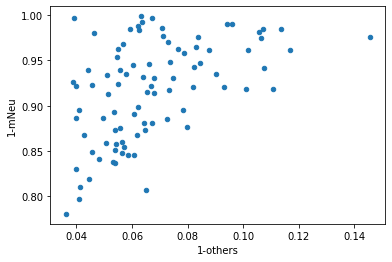

In [2]:

DMRdf.plot.scatter(x='1-others',y='1-'+celltype)

In [3]:

mixturegtdf.head()

,CD4,CD8,nB,NK,Mn,mNeu_real,m8,DC,Eo,Tr,m4,Mg,Er,mB
Mixture,,,,,,,,,,,,,,
mNeuallrange_NR_1000000_insilmix1,3.658338,15.129643,6.549389,2.519957,2.124964,0.0010,17.370805,4.150529,3.904734,6.341092,14.305357,10.982813,3.043748,9.917631
mNeuallrange_NR_1000000_insilmix2,28.998418,7.888731,0.139806,4.502389,8.465556,0.0010,1.305055,4.240278,9.992120,0.685429,5.727341,11.271373,8.457855,8.324650
mNeuallrange_NR_1000000_insilmix3,13.043339,11.133197,11.331170,10.309408,7.306214,0.0010,9.752183,3.163473,11.700620,2.308888,3.907373,1.537092,13.597064,0.908977
mNeuallrange_NR_1000000_insilmix4,8.326258,0.563790,15.085044,1.743070,5.081214,0.0016,13.542170,9.126945,4.780419,9.982930,19.702665,3.882234,0.196097,7.985564
mNeuallrange_NR_1000000_insilmix5,11.057385,4.320846,10.280122,3.859509,9.166333,0.0016,9.090727,12.888631,1.183895,6.149592,1.665733,16.874650,4.591367,8.869610


In [4]:
#mixturegtdf=mixturegtdf/100
mixturegtdf.head()

,CD4,CD8,nB,NK,Mn,mNeu_real,m8,DC,Eo,Tr,m4,Mg,Er,mB
Mixture,,,,,,,,,,,,,,
mNeuallrange_NR_1000000_insilmix1,3.658338,15.129643,6.549389,2.519957,2.124964,0.0010,17.370805,4.150529,3.904734,6.341092,14.305357,10.982813,3.043748,9.917631
mNeuallrange_NR_1000000_insilmix2,28.998418,7.888731,0.139806,4.502389,8.465556,0.0010,1.305055,4.240278,9.992120,0.685429,5.727341,11.271373,8.457855,8.324650
mNeuallrange_NR_1000000_insilmix3,13.043339,11.133197,11.331170,10.309408,7.306214,0.0010,9.752183,3.163473,11.700620,2.308888,3.907373,1.537092,13.597064,0.908977
mNeuallrange_NR_1000000_insilmix4,8.326258,0.563790,15.085044,1.743070,5.081214,0.0016,13.542170,9.126945,4.780419,9.982930,19.702665,3.882234,0.196097,7.985564
mNeuallrange_NR_1000000_insilmix5,11.057385,4.320846,10.280122,3.859509,9.166333,0.0016,9.090727,12.888631,1.183895,6.149592,1.665733,16.874650,4.591367,8.869610


In [5]:
allct=mixturegtdf.columns.tolist()
allct.remove(celltype+"_real")
allct


['CD4',
 'CD8',
 'nB',
 'NK',
 'Mn',
 'm8',
 'DC',
 'Eo',
 'Tr',
 'm4',
 'Mg',
 'Er',
 'mB']

In [6]:
DMRdfct=DMRdf[allct]
DMRdfct.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  13711401 13711603  0.979000  0.941083  0.983000  0.951667  0.937917   
      21459675 21459830  0.977417  0.959500  0.972917  0.959917  0.900333   
      36418604 36418987  0.979792  0.934042  0.948833  0.935417  0.945125   
      38493747 38493790  0.935833  0.918583  0.958500  0.915250  0.811750   
      44333641 44333776  0.971917  0.950833  0.979667  0.948667  0.922500   

                               m8        DC        Eo        Tr        m4  \
chrom start    end                                                          
chr1  13711401 13711603  0.978125  0.906417  0.759000  0.979875  0.969500   
      21459675 21459830  0.990000  0.885750  0.816500  0.964375  0.970375   
      36418604 36418987  0.933063  0.948438  0.838812  0.920000  0.952688   
      38493747 38493790  0.875750  0.862583  0.794500  0.870375  0.910750   
      44333641 44333776  0.975250  0.908167  0.877125  0.967625  0.979000   

                               Mg        Er        mB  
chrom start    end                                     
chr1  13711401 13711603  0.933125  0.867750  0.956750  
      21459675 21459830  0.963625  0.978500  0.966417  
      36418604 36418987  0.938375  0.911438  0.939417  
      38493747 38493790  0.839875  0.884875  0.895667  
      44333641 44333776  0.962125  0.913000  0.971167

In [7]:
DMRdfct=1-DMRdfct
DMRdfct.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  13711401 13711603  0.021000  0.058917  0.017000  0.048333  0.062083   
      21459675 21459830  0.022583  0.040500  0.027083  0.040083  0.099667   
      36418604 36418987  0.020208  0.065958  0.051167  0.064583  0.054875   
      38493747 38493790  0.064167  0.081417  0.041500  0.084750  0.188250   
      44333641 44333776  0.028083  0.049167  0.020333  0.051333  0.077500   

                               m8        DC        Eo        Tr        m4  \
chrom start    end                                                          
chr1  13711401 13711603  0.021875  0.093583  0.241000  0.020125  0.030500   
      21459675 21459830  0.010000  0.114250  0.183500  0.035625  0.029625   
      36418604 36418987  0.066937  0.051562  0.161188  0.080000  0.047312   
      38493747 38493790  0.124250  0.137417  0.205500  0.129625  0.089250   
      44333641 44333776  0.024750  0.091833  0.122875  0.032375  0.021000   

                               Mg        Er        mB  
chrom start    end                                     
chr1  13711401 13711603  0.066875  0.132250  0.043250  
      21459675 21459830  0.036375  0.021500  0.033583  
      36418604 36418987  0.061625  0.088562  0.060583  
      38493747 38493790  0.160125  0.115125  0.104333  
      44333641 44333776  0.037875  0.087000  0.028833

In [8]:
print(DMRdfct.shape)
print(mixturegtdf.shape)
mixturegtdfT=mixturegtdf.transpose(copy=True)
mixturegtdfT=mixturegtdfT.rename(index={celltype+"_real":celltype})
mixturegtdfT.head()

(89, 13)
(60, 14)


Mixture,mNeuallrange_NR_1000000_insilmix1,mNeuallrange_NR_1000000_insilmix2,mNeuallrange_NR_1000000_insilmix3,mNeuallrange_NR_1000000_insilmix4,mNeuallrange_NR_1000000_insilmix5,mNeuallrange_NR_1000000_insilmix6,mNeuallrange_NR_1000000_insilmix7,mNeuallrange_NR_1000000_insilmix8,mNeuallrange_NR_1000000_insilmix9,mNeuallrange_NR_1000000_insilmix10,...,mNeuallrange_NR_1000000_insilmix51,mNeuallrange_NR_1000000_insilmix52,mNeuallrange_NR_1000000_insilmix53,mNeuallrange_NR_1000000_insilmix54,mNeuallrange_NR_1000000_insilmix55,mNeuallrange_NR_1000000_insilmix56,mNeuallrange_NR_1000000_insilmix57,mNeuallrange_NR_1000000_insilmix58,mNeuallrange_NR_1000000_insilmix59,mNeuallrange_NR_1000000_insilmix60
CD4,3.658338,28.998418,13.043339,8.326258,11.057385,7.984087,1.015611,11.578789,8.669651,2.047672,...,3.627592,0.736893,5.679287,5.069666,2.854743,9.567941,8.207536,5.832157,14.287743,9.713708
CD8,15.129643,7.888731,11.133197,0.563790,4.320846,10.330288,14.482626,2.968974,2.115561,8.869610,...,0.496326,3.341067,4.561751,4.810943,1.816491,1.013568,0.570265,8.396169,6.676027,0.401617
nB,6.549389,0.139806,11.331170,15.085044,10.280122,1.902664,6.652115,8.086402,7.497317,8.488797,...,3.699996,4.237558,3.314309,2.472727,10.293215,0.320721,5.069678,10.251351,13.416652,13.672974
NK,2.519957,4.502389,10.309408,1.743070,3.859509,2.027474,3.657478,8.331108,11.107622,3.870335,...,2.683142,6.113039,5.477381,5.803734,1.845892,3.955265,1.343453,6.283376,0.247697,7.858430
Mn,2.124964,8.465556,7.306214,5.081214,9.166333,10.570509,4.068842,1.534038,1.874254,8.350292,...,2.186516,4.040560,5.033466,1.367626,5.047452,9.133112,1.985026,0.978043,7.006823,0.313313


In [9]:
mixturegtdfTForTPR=mixturegtdfT.loc[celltype,:]


In [10]:
mixturegtdfTForFPR=mixturegtdfT.drop([celltype])

In [11]:
DMRwiseFPR=DMRdfct.dot(mixturegtdfTForFPR)
DMRwiseFPR.head()

Mixture                  mNeuallrange_NR_1000000_insilmix1  \
chrom start    end                                           
chr1  13711401 13711603                           5.172600   
      21459675 21459830                           3.997673   
      36418604 36418987                           6.423815   
      38493747 38493790                          11.125527   
      44333641 44333776                           4.037148   

Mixture                  mNeuallrange_NR_1000000_insilmix2  \
chrom start    end                                           
chr1  13711401 13711603                           7.073619   
      21459675 21459830                           5.398922   
      36418604 36418987                           6.059210   
      38493747 38493790                          11.529336   
      44333641 44333776                           5.286990   

Mixture                  mNeuallrange_NR_1000000_insilmix3  \
chrom start    end                                           
chr1  13711401 13711603                           7.509539   
      21459675 21459830                           5.376561   
      36418604 36418987                           7.069892   
      38493747 38493790                          11.067984   
      44333641 44333776                           5.633299   

Mixture                  mNeuallrange_NR_1000000_insilmix4  \
chrom start    end                                           
chr1  13711401 13711603                           4.599438   
      21459675 21459830                           4.604047   
      36418604 36418987                           5.987552   
      38493747 38493790                          10.759527   
      44333641 44333776                           3.943574   

Mixture                  mNeuallrange_NR_1000000_insilmix5  \
chrom start    end                                           
chr1  13711401 13711603                           5.401372   
      21459675 21459830                           4.830912   
      36418604 36418987                           5.805270   
      38493747 38493790                          11.786349   
      44333641 44333776                           4.722974   

Mixture                  mNeuallrange_NR_1000000_insilmix6  \
chrom start    end                                           
chr1  13711401 13711603                           6.706237   
      21459675 21459830                           5.647429   
      36418604 36418987                           6.585339   
      38493747 38493790                          12.483200   
      44333641 44333776                           5.306223   

Mixture                  mNeuallrange_NR_1000000_insilmix7  \
chrom start    end                                           
chr1  13711401 13711603                           5.826783   
      21459675 21459830                           4.292690   
      36418604 36418987                           6.815688   
      38493747 38493790                          11.537061   
      44333641 44333776                           4.559965   

Mixture                  mNeuallrange_NR_1000000_insilmix8  \
chrom start    end                                           
chr1  13711401 13711603                           6.559489   
      21459675 21459830                           4.480115   
      36418604 36418987                           6.671945   
      38493747 38493790                          11.163336   
      44333641 44333776                           4.813437   

Mixture                  mNeuallrange_NR_1000000_insilmix9  \
chrom start    end                                           
chr1  13711401 13711603                           7.362442   
      21459675 21459830                           5.761671   
      36418604 36418987                           7.072041   
      38493747 38493790                          11.952818   
      44333641 44333776                           5.519674   

Mixture                  mNeuallrange_NR_1000000_insilmix10  ...  \
chrom start    en

In [12]:
DMRdfforTPR=1-DMRdf[celltype].to_frame()
DMRdfforTPR.head()

mNeu
chrom start    end               
chr1  13711401 13711603  0.984000
      21459675 21459830  0.893420
      36418604 36418987  0.880880
      38493747 38493790  0.984250
      44333641 44333776  0.912667

In [13]:
mixturegtdfforTPR=(mixturegtdf[celltype+"_real"].to_frame())
mixturegtdfforTPR=mixturegtdfforTPR.rename(columns={celltype+"_real":celltype})
mixturegtdfTforTPR=mixturegtdfforTPR.transpose(copy=True)
mixturegtdfTforTPR.shape

(1, 60)

In [14]:
mixturegtdfTforTPR

Mixture,mNeuallrange_NR_1000000_insilmix1,mNeuallrange_NR_1000000_insilmix2,mNeuallrange_NR_1000000_insilmix3,mNeuallrange_NR_1000000_insilmix4,mNeuallrange_NR_1000000_insilmix5,mNeuallrange_NR_1000000_insilmix6,mNeuallrange_NR_1000000_insilmix7,mNeuallrange_NR_1000000_insilmix8,mNeuallrange_NR_1000000_insilmix9,mNeuallrange_NR_1000000_insilmix10,...,mNeuallrange_NR_1000000_insilmix51,mNeuallrange_NR_1000000_insilmix52,mNeuallrange_NR_1000000_insilmix53,mNeuallrange_NR_1000000_insilmix54,mNeuallrange_NR_1000000_insilmix55,mNeuallrange_NR_1000000_insilmix56,mNeuallrange_NR_1000000_insilmix57,mNeuallrange_NR_1000000_insilmix58,mNeuallrange_NR_1000000_insilmix59,mNeuallrange_NR_1000000_insilmix60
mNeu,0.001,0.001,0.001,0.0016,0.0016,0.0016,0.0025,0.0025,0.0025,0.0043,...,69.99801,49.9948,49.99695,49.9999,29.9964,29.99691,29.99832,9.99594,9.99539,9.99592


In [15]:
DMRwiseTPR=DMRdfforTPR.dot(mixturegtdfTforTPR)
DMRwiseTPR.head()

Mixture                  mNeuallrange_NR_1000000_insilmix1  \
chrom start    end                                           
chr1  13711401 13711603                           0.000984   
      21459675 21459830                           0.000893   
      36418604 36418987                           0.000881   
      38493747 38493790                           0.000984   
      44333641 44333776                           0.000913   

Mixture                  mNeuallrange_NR_1000000_insilmix2  \
chrom start    end                                           
chr1  13711401 13711603                           0.000984   
      21459675 21459830                           0.000893   
      36418604 36418987                           0.000881   
      38493747 38493790                           0.000984   
      44333641 44333776                           0.000913   

Mixture                  mNeuallrange_NR_1000000_insilmix3  \
chrom start    end                                           
chr1  13711401 13711603                           0.000984   
      21459675 21459830                           0.000893   
      36418604 36418987                           0.000881   
      38493747 38493790                           0.000984   
      44333641 44333776                           0.000913   

Mixture                  mNeuallrange_NR_1000000_insilmix4  \
chrom start    end                                           
chr1  13711401 13711603                           0.001574   
      21459675 21459830                           0.001429   
      36418604 36418987                           0.001409   
      38493747 38493790                           0.001575   
      44333641 44333776                           0.001460   

Mixture                  mNeuallrange_NR_1000000_insilmix5  \
chrom start    end                                           
chr1  13711401 13711603                           0.001575   
      21459675 21459830                           0.001430   
      36418604 36418987                           0.001410   
      38493747 38493790                           0.001575   
      44333641 44333776                           0.001460   

Mixture                  mNeuallrange_NR_1000000_insilmix6  \
chrom start    end                                           
chr1  13711401 13711603                           0.001575   
      21459675 21459830                           0.001430   
      36418604 36418987                           0.001410   
      38493747 38493790                           0.001575   
      44333641 44333776                           0.001460   

Mixture                  mNeuallrange_NR_1000000_insilmix7  \
chrom start    end                                           
chr1  13711401 13711603                           0.002460   
      21459675 21459830                           0.002233   
      36418604 36418987                           0.002202   
      38493747 38493790                           0.002460   
      44333641 44333776                           0.002281   

Mixture                  mNeuallrange_NR_1000000_insilmix8  \
chrom start    end                                           
chr1  13711401 13711603                           0.002460   
      21459675 21459830                           0.002234   
      36418604 36418987                           0.002202   
      38493747 38493790                           0.002461   
      44333641 44333776                           0.002282   

Mixture                  mNeuallrange_NR_1000000_insilmix9  \
chrom start    end                                           
chr1  13711401 13711603                           0.002460   
      21459675 21459830                           0.002234   
      36418604 36418987                           0.002202   
      38493747 38493790                           0.002461   
      44333641 44333776                           0.002282   

Mixture                  mNeuallrange_NR_1000000_insilmix10  ...  \
chrom start    en

In [16]:
DMRwiseTPRavg=DMRwiseTPR.mean(axis=1) ############

In [17]:
mixturegtTN=100-mixturegtdf[celltype+"_real"].to_frame()
mixturegtTN.rename(columns={celltype+"_real":'TN'},inplace=True)
mixturegtTN=mixturegtTN.transpose()
mixturegtTN.head()

Mixture,mNeuallrange_NR_1000000_insilmix1,mNeuallrange_NR_1000000_insilmix2,mNeuallrange_NR_1000000_insilmix3,mNeuallrange_NR_1000000_insilmix4,mNeuallrange_NR_1000000_insilmix5,mNeuallrange_NR_1000000_insilmix6,mNeuallrange_NR_1000000_insilmix7,mNeuallrange_NR_1000000_insilmix8,mNeuallrange_NR_1000000_insilmix9,mNeuallrange_NR_1000000_insilmix10,...,mNeuallrange_NR_1000000_insilmix51,mNeuallrange_NR_1000000_insilmix52,mNeuallrange_NR_1000000_insilmix53,mNeuallrange_NR_1000000_insilmix54,mNeuallrange_NR_1000000_insilmix55,mNeuallrange_NR_1000000_insilmix56,mNeuallrange_NR_1000000_insilmix57,mNeuallrange_NR_1000000_insilmix58,mNeuallrange_NR_1000000_insilmix59,mNeuallrange_NR_1000000_insilmix60
TN,99.999,99.999,99.999,99.9984,99.9984,99.9984,99.9975,99.9975,99.9975,99.9957,...,30.00199,50.0052,50.00305,50.0001,70.0036,70.00309,70.00168,90.00406,90.00461,90.00408


In [18]:
DMRwiseFPRavg=DMRwiseFPR/mixturegtTN.loc['TN']
DMRwiseFPRavg=DMRwiseFPRavg.mean(axis=1)
DMRwiseFPRavg

chrom  start      end      
chr1   13711401   13711603     0.064447
       21459675   21459830     0.051739
       36418604   36418987     0.066533
       38493747   38493790     0.116558
       44333641   44333776     0.050377
                                 ...   
chr9   37338885   37338952     0.062158
       92601344   92601470     0.060187
       111884973  111885058    0.057608
       128149248  128149514    0.112283
       131123384  131123452    0.062561
Length: 89, dtype: float64

In [19]:

def plt_corr(x, y,combined):
    fig = plt.figure()
    lm = sns.lmplot(x=x, y=y, data=combined)
    ax = lm.axes[0, 0]
    p_corr = np.around(corrdf_pearson[x][y], decimals=3)
    s_corr = np.around(corrdf_spearman[x][y], decimals=3)
    p_val_pearson = np.around(pearsonr(combined[x], combined[y])[1], decimals=8)
    p_val_spearman = np.around(spearmanr(combined[x], combined[y])[1], decimals=8)
    txt = 'r = ' + str(p_corr) + ', p-val = ' + str(p_val_pearson) + '\nrho = ' + str(s_corr) + ', p-val = ' + str(p_val_spearman)
    ax.text(np.array(combined[x].sort_values())[0], np.array(combined[y].sort_values())[-2], txt, horizontalalignment='left', verticalalignment='bottom')
    return lm

In [20]:
RDstats='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_final.txt_folder_mincpg1_feature_significance_Allfile_DMRwise_avg.txt_stats.txt' #'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/mincpg1_feature_significance_Allfile_DMRwise_avg.txt_stats.txt'

RDstatsdf=pd.read_csv(RDstats,sep="\t",index_col=['chrom','start','end'])
RDstatsdf.head()

#TP_fragment  #FP_fragment  #TN_fragment  \
chrom start    end                                                  
chr1  13711401 13711603       17.0500      8.233333    150.545833   
      21459675 21459830       20.8625     10.095833    226.662500   
      36418604 36418987       15.2750      5.722917    135.335417   
      38493747 38493790       18.6375      2.879167    113.470833   
      44333641 44333776       20.4625      6.862500    188.150000   

                         #FN_fragment  #Total_Fragment       TPR       FPR  \
chrom start    end                                                           
chr1  13711401 13711603        0.2000       176.029167  0.995020  0.059892   
      21459675 21459830       10.1000       267.720833  0.524111  0.040167   
      36418604 36418987        2.9375       159.270833  0.848367  0.042439   
      38493747 38493790        0.4250       135.412500  0.973060  0.023897   
      44333641 44333776        4.3375       219.812500  0.890746  0.033740   

                              FDR             q      diff  ...   mNeu-m4  \
chrom start    end                                         ...             
chr1  13711401 13711603  0.730387  2.165600e-06 -0.921644  ... -0.953500   
      21459675 21459830  0.720196  1.548500e-06 -0.839886  ... -0.863795   
      36418604 36418987  0.774575  2.424900e-12 -0.816691  ... -0.833567   
      38493747 38493790  0.760633  8.917500e-06 -0.870515  ... -0.895000   
      44333641 44333776  0.766444  1.730800e-06 -0.861364  ... -0.891667   

                          mNeu-Mg   mNeu-Er   mNeu-mB  \
chrom start    end                                      
chr1  13711401 13711603 -0.917125 -0.851750 -0.940750   
      21459675 21459830 -0.857045 -0.871920 -0.859837   
      36418604 36418987 -0.819255 -0.792318 -0.820297   
      38493747 38493790 -0.824125 -0.869125 -0.879917   
      44333641 44333776 -0.874792 -0.825667 -0.883834   

                         maxCompartmentwisedelta  minCompartmentwiseDelta  \
chrom start    end                                                          
chr1  13711401 13711603                -0.743000                -0.967000   
      21459675 21459830                -0.709920                -0.883420   
      36418604 36418987                -0.719692                -0.860672   
      38493747 38493790                -0.778750                -0.942750   
      44333641 44333776                -0.789792                -0.892334   

                         DMRlength  #cpg/DMRlength  DMRlength/#Total_Fragment  \
chrom start    end                                                              
chr1  13711401 13711603        202        0.019802                   1.147537   
      21459675 21459830        155        0.025806                   0.578961   
      36418604 36418987        383        0.020888                   2.404709   
      38493747 38493790         43        0.093023                   0.317548   
      44333641 44333776        135        0.029630                   0.614160   

                         #Total_Fragment/DMRlength  
chrom start    end                                  
chr1  13711401 13711603                   0.871432  
      21459675 21459830                   1.727231  
      36418604 36418987                   0.415851  
      38493747 38493790                   3.149128  
      44333641 44333776                   1.628241  

[5 rows x 49 columns]

In [21]:
RDstatsdf=RDstatsdf.merge(DMRwiseFPRavg.rename('SMestimatedFPR'),on=['chrom','start','end'])
RDstatsdf.head()

#TP_fragment  #FP_fragment  #TN_fragment  \
chrom start    end                                                  
chr1  13711401 13711603       17.0500      8.233333    150.545833   
      21459675 21459830       20.8625     10.095833    226.662500   
      36418604 36418987       15.2750      5.722917    135.335417   
      38493747 38493790       18.6375      2.879167    113.470833   
      44333641 44333776       20.4625      6.862500    188.150000   

                         #FN_fragment  #Total_Fragment       TPR       FPR  \
chrom start    end                                                           
chr1  13711401 13711603        0.2000       176.029167  0.995020  0.059892   
      21459675 21459830       10.1000       267.720833  0.524111  0.040167   
      36418604 36418987        2.9375       159.270833  0.848367  0.042439   
      38493747 38493790        0.4250       135.412500  0.973060  0.023897   
      44333641 44333776        4.3375       219.812500  0.890746  0.033740   

                              FDR             q      diff  ...   mNeu-Mg  \
chrom start    end                                         ...             
chr1  13711401 13711603  0.730387  2.165600e-06 -0.921644  ... -0.917125   
      21459675 21459830  0.720196  1.548500e-06 -0.839886  ... -0.857045   
      36418604 36418987  0.774575  2.424900e-12 -0.816691  ... -0.819255   
      38493747 38493790  0.760633  8.917500e-06 -0.870515  ... -0.824125   
      44333641 44333776  0.766444  1.730800e-06 -0.861364  ... -0.874792   

                          mNeu-Er   mNeu-mB  maxCompartmentwisedelta  \
chrom start    end                                                     
chr1  13711401 13711603 -0.851750 -0.940750                -0.743000   
      21459675 21459830 -0.871920 -0.859837                -0.709920   
      36418604 36418987 -0.792318 -0.820297                -0.719692   
      38493747 38493790 -0.869125 -0.879917                -0.778750   
      44333641 44333776 -0.825667 -0.883834                -0.789792   

                         minCompartmentwiseDelta  DMRlength  #cpg/DMRlength  \
chrom start    end                                                            
chr1  13711401 13711603                -0.967000        202        0.019802   
      21459675 21459830                -0.883420        155        0.025806   
      36418604 36418987                -0.860672        383        0.020888   
      38493747 38493790                -0.942750         43        0.093023   
      44333641 44333776                -0.892334        135        0.029630   

                         DMRlength/#Total_Fragment  #Total_Fragment/DMRlength  \
chrom start    end                                                              
chr1  13711401 13711603                   1.147537                   0.871432   
      21459675 21459830                   0.578961                   1.727231   
      36418604 36418987                   2.404709                   0.415851   
      38493747 38493790                   0.317548                   3.149128   
      44333641 44333776                   0.614160                   1.628241   

                         SMestimatedFPR  
chrom start    end                       
chr1  13711401 13711603        0.064447  
      21459675 21459830        0.051739  
      36418604 36418987        0.066533  
      38493747 38493790        0.116558  
      44333641 44333776        0.050377  

[5 rows x 50 columns]

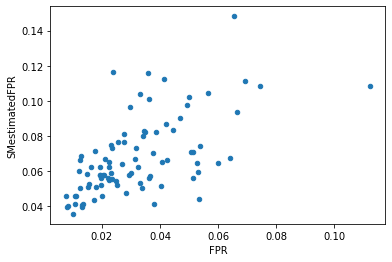

In [22]:
RDstatsdf.plot.scatter(x='FPR',y='SMestimatedFPR')

In [23]:
RDstatsdf=RDstatsdf.merge(DMRdfforTPR,on=['chrom','start','end'])
RDstatsdf.head()

#TP_fragment  #FP_fragment  #TN_fragment  \
chrom start    end                                                  
chr1  13711401 13711603       17.0500      8.233333    150.545833   
      21459675 21459830       20.8625     10.095833    226.662500   
      36418604 36418987       15.2750      5.722917    135.335417   
      38493747 38493790       18.6375      2.879167    113.470833   
      44333641 44333776       20.4625      6.862500    188.150000   

                         #FN_fragment  #Total_Fragment       TPR       FPR  \
chrom start    end                                                           
chr1  13711401 13711603        0.2000       176.029167  0.995020  0.059892   
      21459675 21459830       10.1000       267.720833  0.524111  0.040167   
      36418604 36418987        2.9375       159.270833  0.848367  0.042439   
      38493747 38493790        0.4250       135.412500  0.973060  0.023897   
      44333641 44333776        4.3375       219.812500  0.890746  0.033740   

                              FDR             q      diff  ...   mNeu-Er  \
chrom start    end                                         ...             
chr1  13711401 13711603  0.730387  2.165600e-06 -0.921644  ... -0.851750   
      21459675 21459830  0.720196  1.548500e-06 -0.839886  ... -0.871920   
      36418604 36418987  0.774575  2.424900e-12 -0.816691  ... -0.792318   
      38493747 38493790  0.760633  8.917500e-06 -0.870515  ... -0.869125   
      44333641 44333776  0.766444  1.730800e-06 -0.861364  ... -0.825667   

                          mNeu-mB  maxCompartmentwisedelta  \
chrom start    end                                           
chr1  13711401 13711603 -0.940750                -0.743000   
      21459675 21459830 -0.859837                -0.709920   
      36418604 36418987 -0.820297                -0.719692   
      38493747 38493790 -0.879917                -0.778750   
      44333641 44333776 -0.883834                -0.789792   

                         minCompartmentwiseDelta  DMRlength  #cpg/DMRlength  \
chrom start    end                                                            
chr1  13711401 13711603                -0.967000        202        0.019802   
      21459675 21459830                -0.883420        155        0.025806   
      36418604 36418987                -0.860672        383        0.020888   
      38493747 38493790                -0.942750         43        0.093023   
      44333641 44333776                -0.892334        135        0.029630   

                         DMRlength/#Total_Fragment  #Total_Fragment/DMRlength  \
chrom start    end                                                              
chr1  13711401 13711603                   1.147537                   0.871432   
      21459675 21459830                   0.578961                   1.727231   
      36418604 36418987                   2.404709                   0.415851   
      38493747 38493790                   0.317548                   3.149128   
      44333641 44333776                   0.614160                   1.628241   

                         SMestimatedFPR    mNeu_y  
chrom start    end                                 
chr1  13711401 13711603        0.064447  0.984000  
      21459675 21459830        0.051739  0.893420  
      36418604 36418987        0.066533  0.880880  
      38493747 38493790        0.116558  0.984250  
      44333641 44333776        0.050377  0.912667  

[5 rows x 51 columns]

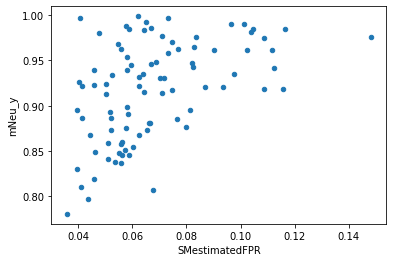

In [24]:
RDstatsdf.plot.scatter(x='SMestimatedFPR',y=celltype+'_y')

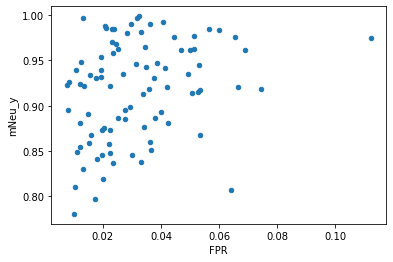

In [25]:
RDstatsdf.plot.scatter(x='FPR',y=celltype+'_y')

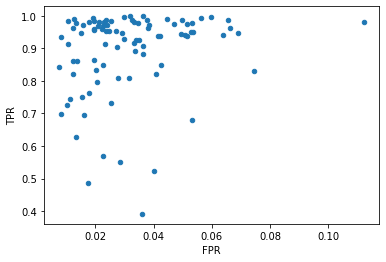

In [26]:
RDstatsdf.plot.scatter(x='FPR',y='TPR')

In [27]:
RDstatsdf['1-others']=1-RDstatsdf['others']

In [28]:
RDstatsdf.to_csv(RDstats+"_withSMestimated.txt",sep="\t")

In [29]:
# sns.scatterplot(combined['FDR'], combined['FPR'])
corrdf_pearson=RDstatsdf.corr(method='pearson')
corrdf_spearman=RDstatsdf.corr(method='spearman')

<Figure size 432x288 with 0 Axes>

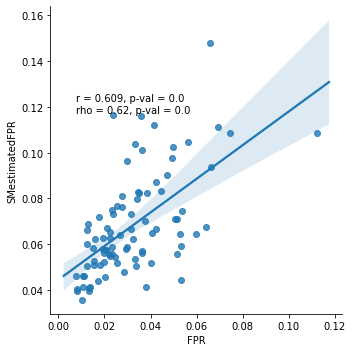

In [30]:
x = 'FPR'
y = 'SMestimatedFPR'
fig = plt_corr(x, y,RDstatsdf)

<Figure size 432x288 with 0 Axes>

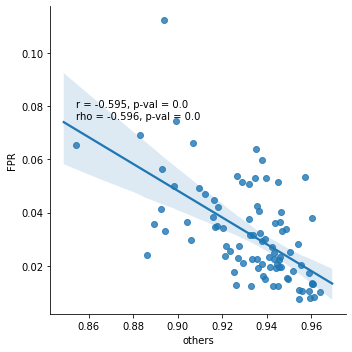

In [31]:
x = 'others'
y = 'FPR'
fig = plt_corr(x, y,RDstatsdf)

<Figure size 432x288 with 0 Axes>

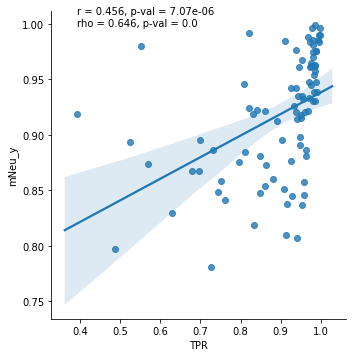

In [32]:
x = 'TPR'
y = celltype+'_y'
fig = plt_corr(x, y,RDstatsdf)

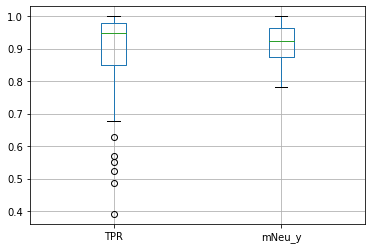

In [33]:
RDstatsdf.boxplot(column=['TPR', celltype+'_y'])

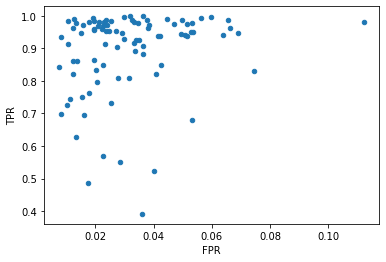

In [34]:
RDstatsdf.plot.scatter(x='FPR',y='TPR')

In [35]:
forColorcodeRDstatsdf=(RDstatsdf.sort_values('TPR')).reset_index()

forColorcodeRDstatsdf.index.name ='IndexName'
forColorcodeRDstatsdf['DMRindex']=forColorcodeRDstatsdf.index
forColorcodeRDstatsdf.head()

,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,...,maxCompartmentwisedelta,minCompartmentwiseDelta,DMRlength,#cpg/DMRlength,DMRlength/#Total_Fragment,#Total_Fragment/DMRlength,SMestimatedFPR,mNeu_y,1-others,DMRindex
IndexName,,,,,,,,,,,,,,,,,,,,,
0,chr14,20897241,20897309,24.000000,8.745833,226.162500,4.887500,263.795833,0.391551,0.035917,...,-0.732875,-0.873667,68,0.058824,0.257775,3.879350,0.115863,0.918500,0.11058,0
1,chr14,52304989,52305296,13.850000,1.820833,136.166667,3.150000,154.987500,0.487233,0.017313,...,-0.706705,-0.792663,307,0.013029,1.980805,0.504845,0.043769,0.797080,0.04085,1
2,chr1,21459675,21459830,20.862500,10.095833,226.662500,10.100000,267.720833,0.524111,0.040167,...,-0.709920,-0.883420,155,0.025806,0.578961,1.727231,0.051739,0.893420,0.05353,2
3,chr16,15971368,15971868,18.313636,4.272727,140.471212,1.622727,164.680303,0.551932,0.028337,...,-0.839379,-0.961651,500,0.022000,3.036186,0.329361,0.047767,0.980424,0.04617,3
4,chr15,101056964,101057014,27.533333,5.777778,240.288889,5.891667,279.491667,0.569963,0.022423,...,-0.702580,-0.848219,50,0.120000,0.178896,5.589833,0.065363,0.873330,0.06462,4


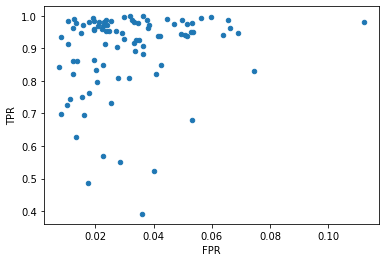

In [36]:
forColorcodeRDstatsdf.plot.scatter(x='FPR',y='TPR')

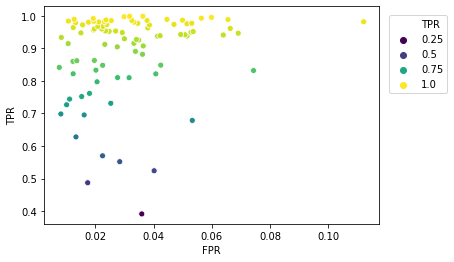

In [37]:
ax=sns.scatterplot(x='FPR',y='TPR', data=forColorcodeRDstatsdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

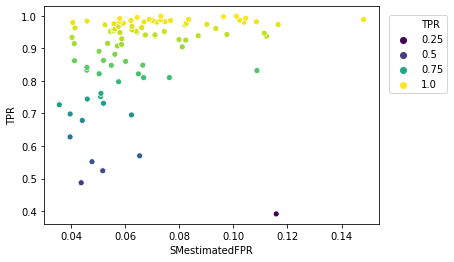

In [38]:
ax = sns.scatterplot(x='SMestimatedFPR',y='TPR', data=forColorcodeRDstatsdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

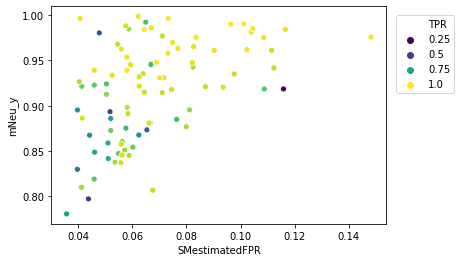

In [39]:
ax=sns.scatterplot(x='SMestimatedFPR',y=celltype+'_y', data=forColorcodeRDstatsdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

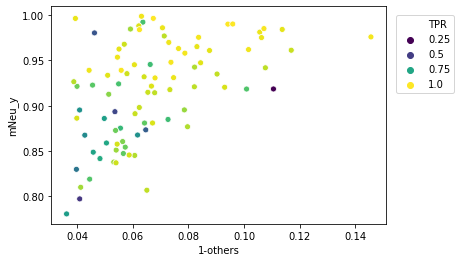

In [40]:
ax =sns.scatterplot(x='1-others',y=celltype+'_y', data=forColorcodeRDstatsdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

<Figure size 432x288 with 0 Axes>

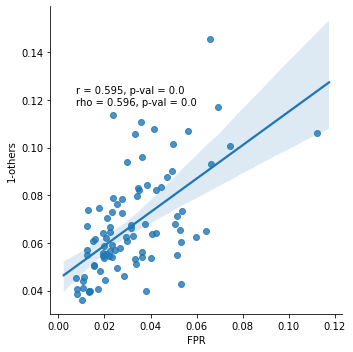

In [41]:
x = 'FPR'
y = '1-others'
fig = plt_corr(x, y,forColorcodeRDstatsdf)

<Figure size 432x288 with 0 Axes>

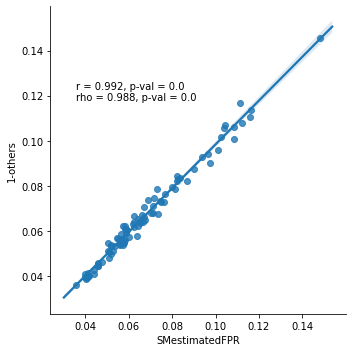

In [42]:
x = 'SMestimatedFPR'
y = '1-others'
fig = plt_corr(x, y,forColorcodeRDstatsdf)